### Importing

In [1]:
#libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pylab as pl

In [2]:
# Data
path = r'/Users/jennyfevik/Desktop/IC Basket Analysis'

In [3]:
ic_data = pd.read_pickle(os.path.join(path, 'Data', 'Prepared', 'ic_data.pkl'))

In [4]:
#Checking data
ic_data.shape

(32435070, 33)

In [5]:
ic_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,user_frequency,first_name,last_name,Gender,STATE,Age,date_joined,number_dependants,fam_status,income
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,...,NaN,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,...,Non-frequent,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,...,Frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0


### Creating bar chart

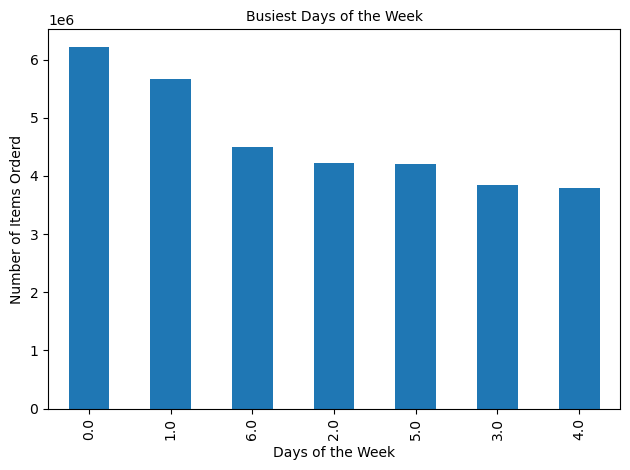

In [6]:
ic_data['orders_day_of_week'].value_counts().plot.bar()
plt.xlabel('Days of the Week', fontsize = 10,)
plt.ylabel('Number of Items Orderd', fontsize = 10)
plt.title('Busiest Days of the Week', fontsize = 10)
plt.tight_layout()
plt.show()

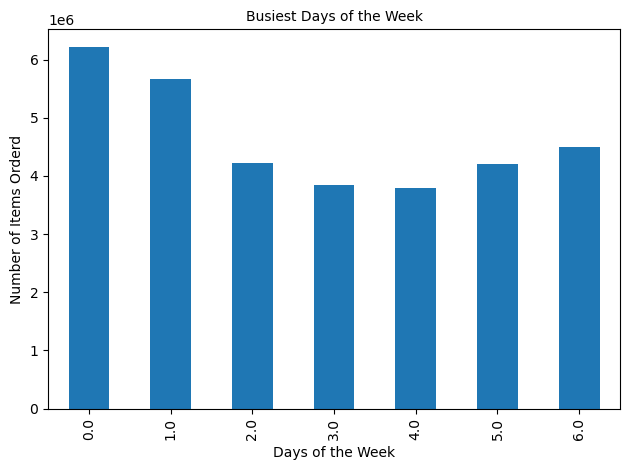

In [7]:
# sorting chart
ic_data['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Days of the Week', fontsize = 10,)
plt.ylabel('Number of Items Orderd', fontsize = 10)
plt.title('Busiest Days of the Week', fontsize = 10)
plt.tight_layout()
plt.show()

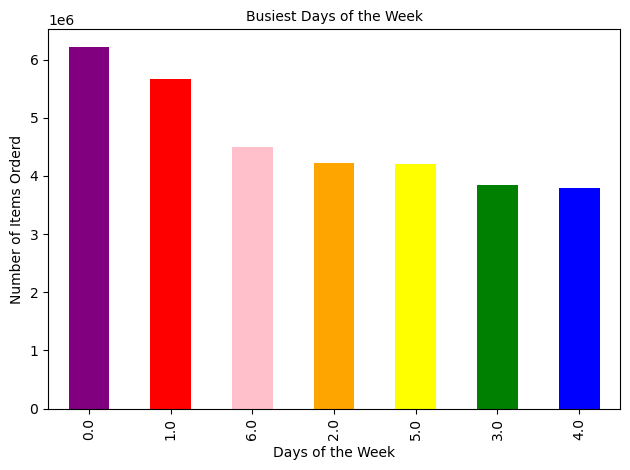

In [9]:
# coloring chart
ic_data['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.xlabel('Days of the Week', fontsize = 10,)
plt.ylabel('Number of Items Orderd', fontsize = 10)
plt.title('Busiest Days of the Week', fontsize = 10)
plt.tight_layout()
plt.show()

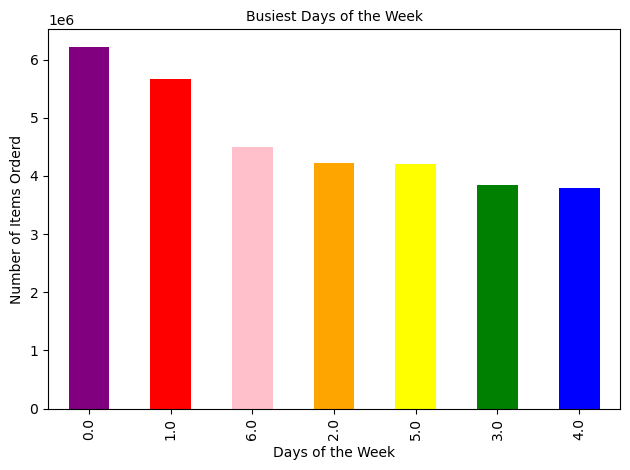

In [10]:
# saving chart
bar = ic_data['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.xlabel('Days of the Week', fontsize = 10,)
plt.ylabel('Number of Items Orderd', fontsize = 10)
plt.title('Busiest Days of the Week', fontsize = 10)
plt.tight_layout()
plt.show()

In [11]:
# exporting bar chart
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating Histograms

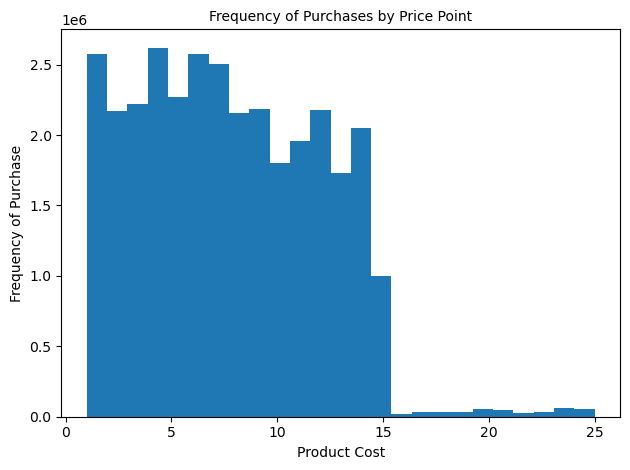

In [12]:
# with 25 bins
ic_data['prices'].plot.hist(bins = 25)
plt.xlabel('Product Cost', fontsize = 10,)
plt.ylabel('Frequency of Purchase', fontsize = 10)
plt.title('Frequency of Purchases by Price Point', fontsize = 10)
plt.tight_layout()
plt.show()

I had previously done (and lost) this step, and had gone back and fixed the prices outliers in the data from 4.8, so the outliers are no longer showing up since I had to start over from that fixed data.

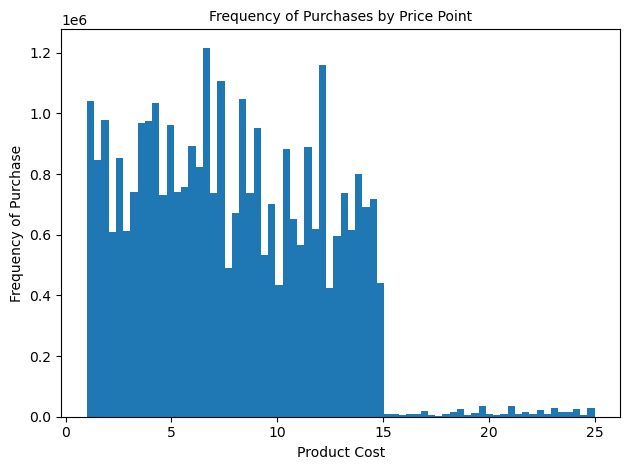

In [13]:
# with 70 bins
ic_data['prices'].plot.hist(bins = 70)
plt.xlabel('Product Cost', fontsize = 10,)
plt.ylabel('Frequency of Purchase', fontsize = 10)
plt.title('Frequency of Purchases by Price Point', fontsize = 10)
plt.tight_layout()
plt.show()

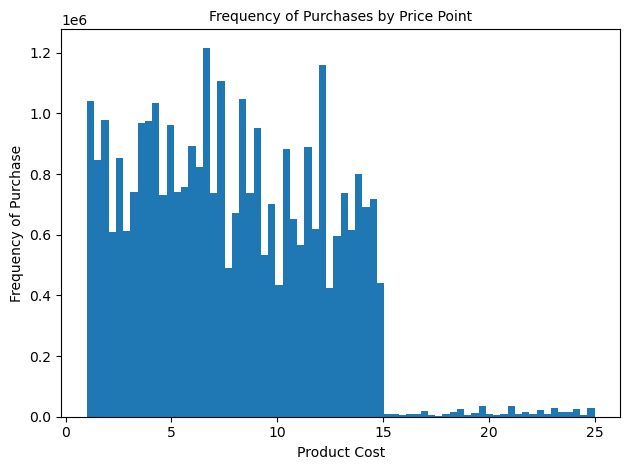

In [14]:
# saving histogram
hist = ic_data['prices'].plot.hist(bins = 70)
plt.xlabel('Product Cost', fontsize = 10,)
plt.ylabel('Frequency of Purchase', fontsize = 10)
plt.title('Frequency of Purchases by Price Point', fontsize = 10)
plt.tight_layout()
plt.show()

In [15]:
# exporting histogram
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'histogram_prices.png'))

### Creating scatterplot

<Axes: xlabel='prices', ylabel='prices'>

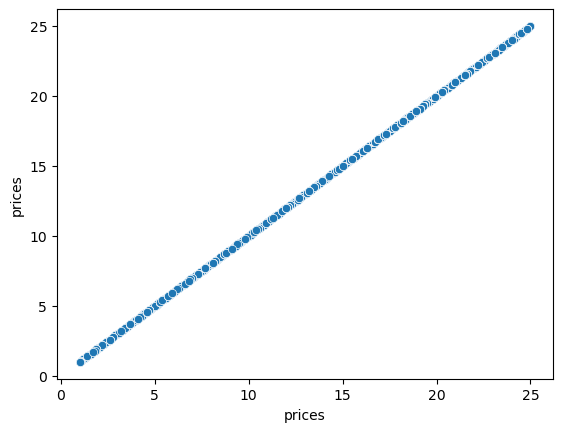

In [16]:
sns.scatterplot(x = 'prices', y = 'prices', data = ic_data)

The scatterplot looks different from the exercise because of the previously fixed outliers

### Creating line chart

In [17]:
# creating sample
dev = np.random.rand(len(ic_data)) <=.07

In [18]:
# 70 %
big = ic_data[dev]

In [19]:
#30 %
small = ic_data[~dev]

In [20]:
# checking
len(ic_data)

32435070

In [21]:
len(big) + len(small)

32435070

In [22]:
# creating data frame with specific columns
df_2 = small[['orders_day_of_week', 'prices']]

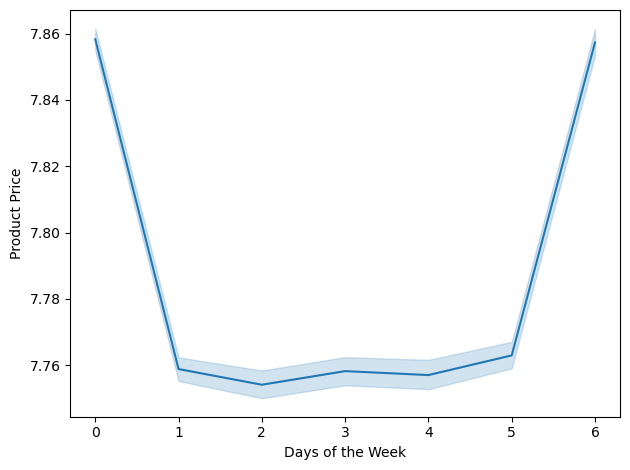

In [23]:
# creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')
plt.xlabel('Days of the Week', fontsize = 10,)
plt.ylabel('Product Price', fontsize = 10)
plt.tight_layout()
plt.show()

In [24]:
# exporting line chart
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_dow_prices.png'))

### Histogram for order hour of day

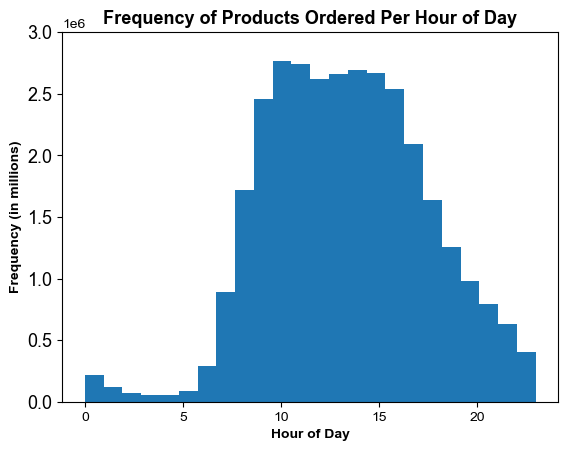

In [25]:
#Creating a histogram to show orders by hour of the day - 24 hours of the day, 24 bins
hist2 = ic_data['order_hour_of_day'].plot.hist(bins = 24)
sns.set_style('ticks')
plt.xlabel('Hour of Day',fontsize=10, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=10, fontweight = 'bold')
plt.xticks(fontsize=10)
y_ticks = np.arange(1, 3100000, 500000)
plt.yticks(y_ticks, fontsize=13)
plt.title('Frequency of Products Ordered Per Hour of Day',fontsize=13, fontweight = 'bold')
plt.show()

Midnight to 6 am are the slowest times. Customer traffic begings increasing around 7 am, peaking around 9 am, staying seady until about 5 pm, then steadily declinging for the evening. 

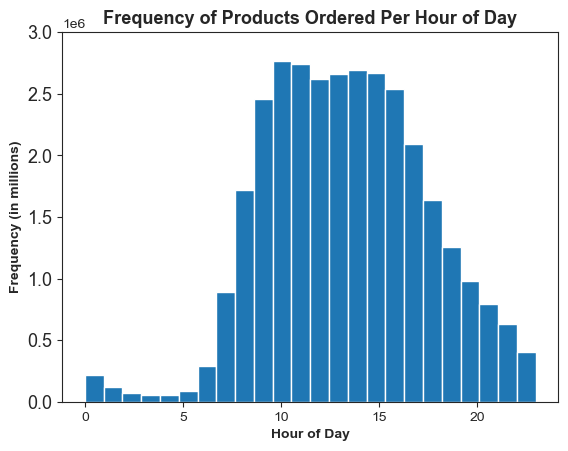

In [26]:
# saving chart
hist_hour = ic_data['order_hour_of_day'].plot.hist(bins = 24)
sns.set_style('ticks')
plt.xlabel('Hour of Day',fontsize=10, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=10, fontweight = 'bold')
plt.xticks(fontsize=10)
y_ticks = np.arange(1, 3100000, 500000)
plt.yticks(y_ticks, fontsize=13)
plt.title('Frequency of Products Ordered Per Hour of Day',fontsize=13, fontweight = 'bold')
plt.show()

In [27]:
# exporting chart
hist_hour.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_hour.png'))

### Bar chart for lyoalty

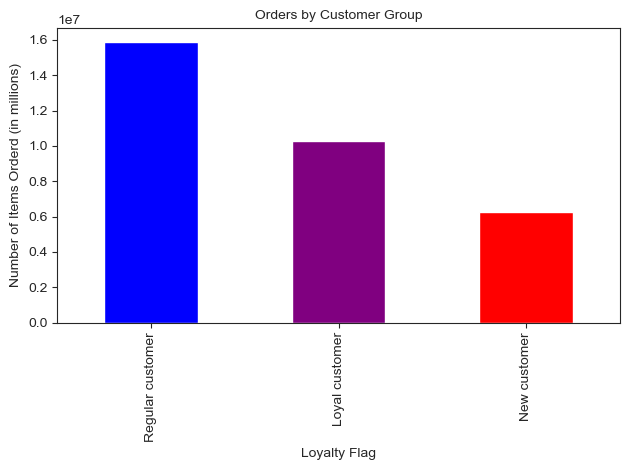

In [28]:
ic_data['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'purple', 'red'])
plt.xlabel('Loyalty Flag', fontsize = 10,)
plt.ylabel('Number of Items Orderd (in millions)', fontsize = 10)
plt.title('Orders by Customer Group', fontsize = 10)
plt.tight_layout()
plt.show()

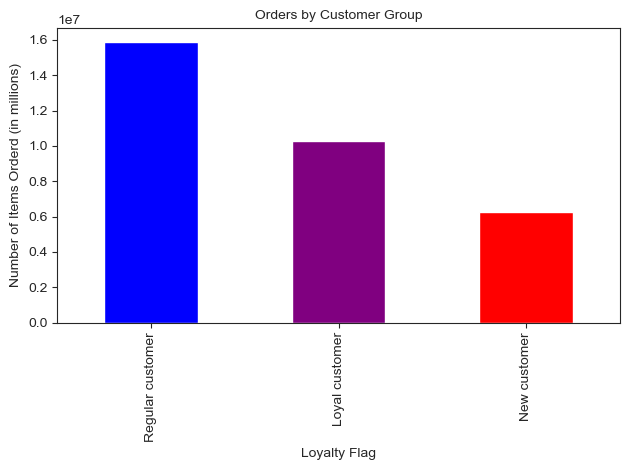

In [29]:
# saving bar chart
bar_loyal = ic_data['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'purple', 'red'])
plt.xlabel('Loyalty Flag', fontsize = 10,)
plt.ylabel('Number of Items Orderd (in millions)', fontsize = 10)
plt.title('Orders by Customer Group', fontsize = 10)
plt.tight_layout()
plt.show()

Regular customer make up the largest group of customers

In [30]:
# exporting bar chart
bar_loyal.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_loyal.png'))

### Checking prices and hour of day

In [31]:
# sample set was created above, creating new df to analyze specified columns only
df_3 = small[['order_hour_of_day', 'prices']]

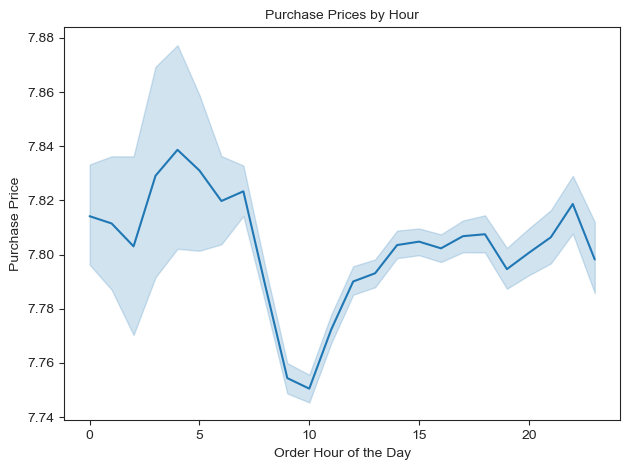

In [32]:
# creating line chart
hour_prices_line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Order Hour of the Day', fontsize = 10,)
plt.ylabel('Purchase Price', fontsize = 10)
plt.title('Purchase Prices by Hour', fontsize = 10)
plt.tight_layout()
plt.show()

According to the chart, customers buy more expensive items when they are shopping in the wee hours of the morning. The busiest time of day is also when the cheapest items are bought. 

In [33]:
# exporting line chart
hour_prices_line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hour_prices_line.png'))

### Connection between age and number of dependents

In [34]:
ic_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,user_frequency,first_name,last_name,Gender,STATE,Age,date_joined,number_dependants,fam_status,income
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,...,NaN,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,...,Non-frequent,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,...,Frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0


In [35]:
# creating specific dataframe
df_4 = small[['Age', 'number_dependants']]

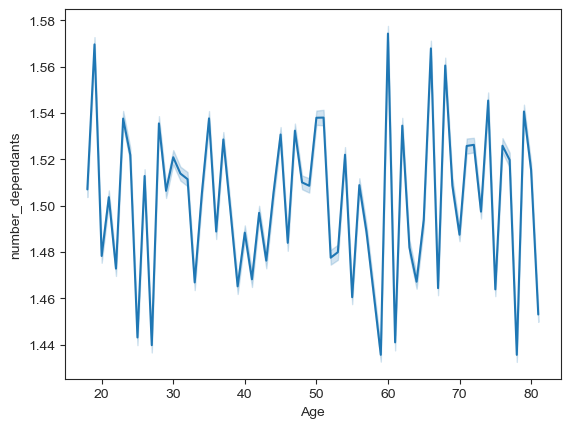

In [36]:
# creating line chart
age_dep_line = sns.lineplot(data = df_4, x = 'Age', y = 'number_dependants')

In [37]:
# exporting line chart
age_dep_line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_dep_line.png'))

### Checking age and spending power

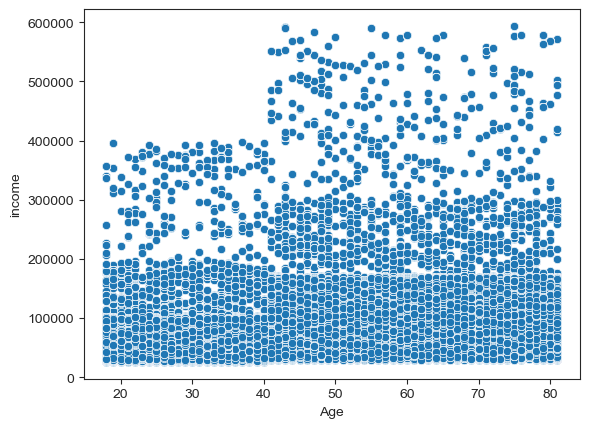

In [38]:
# scatterplot to chack age and income
age_scatter = sns.scatterplot(x = 'Age', y = 'income', data = ic_data)

The scatterplot shows that income increases after the age of 40 for some, but still remains highly concentrated in the lower half of the income scale.

In [39]:
# exporting scatterplot
age_scatter.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_hist.png'))